In [1]:
import pandas as pd
import numpy as np

In [2]:
x_train = pd.read_csv('train_df.csv', index_col=0)
y_train = x_train.pop('Survived')
x_test = pd.read_csv('test_df.csv', index_col=0)
x_train.shape, y_train.shape, x_test.shape

((891, 8), (891,), (418, 8))

# Preprocessing

In [3]:
x_train.drop('PassengerId', axis=1, inplace=True)
x_test.drop('PassengerId', axis=1, inplace=True)

Standard scaling

In [4]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [5]:
features = ['Age', 'Fare']
for feature in features:
    mean, std = x_train[feature].mean(), x_train[feature].std()
    x_train[feature] = (x_train[feature]-mean)/std
    x_test[feature] = (x_test[feature]-mean)/std

Minmax scaling

In [6]:
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
for feature in features:
    x_train = x_train.join(pd.get_dummies(x_train[feature], prefix=feature))
    x_test = x_test.join(pd.get_dummies(x_train[feature], prefix=feature))
    x_train.drop(feature, axis=1, inplace=True)
    x_test.drop(feature, axis=1, inplace=True)


In [7]:
x_train.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_0,Embarked_1,Embarked_2
0,-0.552050,-0.502163,0,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,0.659105,0.786404,1,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,-0.249261,-0.488580,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0.432013,0.420494,1,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0.432013,-0.486064,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [8]:
x_test.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_0,Embarked_1,Embarked_2
0,0.394165,-0.490508,0,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,1.340380,-0.507194,1,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,2.475838,-0.453112,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0
3,-0.173564,-0.473739,1,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,-0.552050,-0.400792,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


# Train models

In [9]:
# LR, DT, RF, SVM
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, plot_confusion_matrix

# define models
LR = LogisticRegression(random_state=123)
DT = DecisionTreeClassifier(random_state=123)
RF = RandomForestClassifier(random_state=123)
SVM = SVC(random_state=123)


LR 5-fold CV accuracy is 81.14494%


/home/smsm8898/libraries/anaconda3/envs/torch/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


DT 5-fold CV accuracy is 77.44398%


/home/smsm8898/libraries/anaconda3/envs/torch/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


RF 5-fold CV accuracy is 79.01576%


/home/smsm8898/libraries/anaconda3/envs/torch/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


SVM 5-fold CV accuracy is 82.26853%


/home/smsm8898/libraries/anaconda3/envs/torch/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


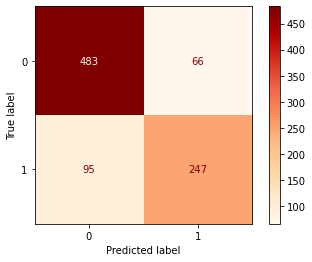

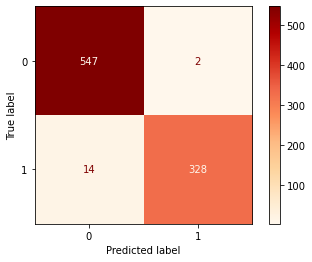

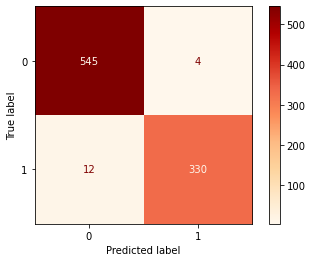

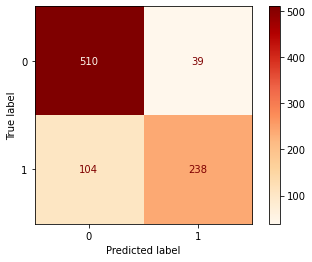

In [10]:
# train models
names = ["LR", "DT", "RF", "SVM"]
models = [LR, DT, RF, SVM]



for i, model in enumerate(models):
    model.fit(x_train, y_train)
    scores = cross_val_score(model, x_train, y_train, cv=5)
    
    print(f'{names[i]} 5-fold CV accuracy is {scores.mean()*100:.5f}%')
    plot_confusion_matrix(model, x_train, y_train,cmap='OrRd')

In [11]:
predictions = []
for i in range(4):
    predictions.append(models[i].predict(x_test))

In [12]:
import pandas as pd
for i in range(4):
    sub = pd.read_csv('dataset/submission.csv')
    sub.loc[:,'Survived']=predictions[i]
    sub.to_csv(f'{names[i]}.csv', index=False)

In [15]:
x_train.shape

(891, 24)

# Deep Learning

In [71]:
import torch
import torch.nn as nn

class DNN(nn.Module):
    def __init__(self, in_features, num_classes=2):
        super(DNN, self).__init__()
        self.dnn = nn.Sequential(
            nn.Linear(in_features, 32),
            nn.Dropout(p=0.3),
            nn.ReLU(),
            
            nn.Linear(32, 64),
            nn.Dropout(p=0.3),
            nn.ReLU(),
            
            nn.Linear(64, 32),
            nn.Dropout(p=0.3),
            nn.ReLU(),
            
            nn.Linear(32, 2),
            nn.Sigmoid()
            
        )
    def forward(self, x):
        x = self.dnn(x)
        return x
    
    
x = x_train.to_numpy()
x = torch.tensor(x).float()
print(x.shape)
in_features=x.shape[1]
model = DNN(in_features)

model, model(x).shape

torch.Size([891, 24])


(DNN(
   (dnn): Sequential(
     (0): Linear(in_features=24, out_features=32, bias=True)
     (1): Dropout(p=0.3, inplace=False)
     (2): ReLU()
     (3): Linear(in_features=32, out_features=64, bias=True)
     (4): Dropout(p=0.3, inplace=False)
     (5): ReLU()
     (6): Linear(in_features=64, out_features=32, bias=True)
     (7): Dropout(p=0.3, inplace=False)
     (8): ReLU()
     (9): Linear(in_features=32, out_features=2, bias=True)
     (10): Sigmoid()
   )
 ),
 torch.Size([891, 2]))

In [76]:
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# hyperparameter
device = torch.device('cuda:2' if torch.cuda.is_available() else 'cpu')
learning_rate = 1e-3
num_epochs = 50
batch_size=32

# loss & optimizr
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# Dataset
x, y = x_train.to_numpy(), y_train.to_numpy()
x, y = torch.tensor(x), torch.tensor(y)
train_dataset = TensorDataset(x, y)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


# Training
model.to(device)
model.train()
for epoch in range(num_epochs):
    losses = []
    num_corrects = []
    for x, y in train_loader:
        # from cpu to gpu
        x, y = x.float().to(device), y.long().to(device)
        
        # forward
        scores = model(x)
        loss = criterion(scores, y)
        losses.append(loss)
        
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # accuracy
        _, prediction = scores.max(1)
        num_correct = (prediction == y).sum()
        num_corrects.append(num_correct)
        
    print('Epoch [{}/{}] Loss {:.4f} Accuracy {:2.2f}'.format(epoch+1,num_epochs,sum(losses)/len(losses), sum(num_corrects)/len(num_corrects)))
        

Epoch [1/50] Loss 0.4814 Accuracy 26.00
Epoch [2/50] Loss 0.4744 Accuracy 26.00
Epoch [3/50] Loss 0.4816 Accuracy 26.00
Epoch [4/50] Loss 0.4782 Accuracy 26.00
Epoch [5/50] Loss 0.4745 Accuracy 26.00
Epoch [6/50] Loss 0.4785 Accuracy 26.00
Epoch [7/50] Loss 0.4755 Accuracy 26.00
Epoch [8/50] Loss 0.4819 Accuracy 26.00
Epoch [9/50] Loss 0.4752 Accuracy 26.00
Epoch [10/50] Loss 0.4776 Accuracy 26.00
Epoch [11/50] Loss 0.4748 Accuracy 26.00
Epoch [12/50] Loss 0.4799 Accuracy 26.00
Epoch [13/50] Loss 0.4812 Accuracy 26.00
Epoch [14/50] Loss 0.4750 Accuracy 26.00
Epoch [15/50] Loss 0.4771 Accuracy 26.00
Epoch [16/50] Loss 0.4733 Accuracy 26.00
Epoch [17/50] Loss 0.4730 Accuracy 26.00
Epoch [18/50] Loss 0.4731 Accuracy 26.00
Epoch [19/50] Loss 0.4740 Accuracy 26.00
Epoch [20/50] Loss 0.4701 Accuracy 26.00
Epoch [21/50] Loss 0.4692 Accuracy 26.00
Epoch [22/50] Loss 0.4704 Accuracy 26.00
Epoch [23/50] Loss 0.4748 Accuracy 26.00
Epoch [24/50] Loss 0.4676 Accuracy 26.00
Epoch [25/50] Loss 0.4716